In [1]:
import mse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import solver as sl
import scipy.interpolate as si

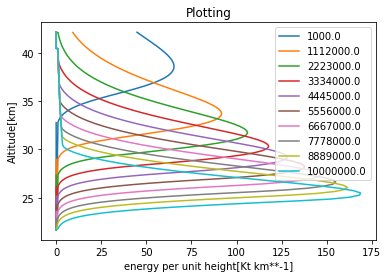

In [2]:
strength = np.linspace(1e3, 1e7, 10)
arr = np.zeros_like(strength)
for i in range(len(strength)):
    arr[i],com_ek, com_z = mse.calculate_mse(radius=10,strength=strength[i])
    plt.plot(com_ek, com_z, label = strength[i])
    plt.title('Plotting')
    plt.xlabel('energy per unit height[Kt km**-1]')
    plt.ylabel('Altitude[km]')
    plt.legend()
    

In [3]:
arr

array([38.31564094, 57.48277076, 40.02344918, 21.46120351, 17.00980778,
       26.24667187, 36.03081184, 44.03347522, 48.87516251, 52.85092115])

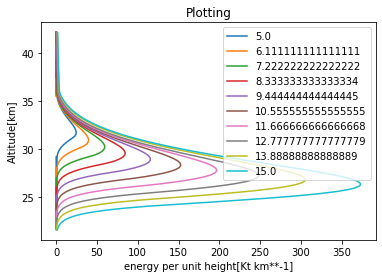

In [4]:
radius = np.linspace(5,15,10)
arr2 = np.zeros_like(radius)
for i in range(len(radius)):
    arr2[i], com_ek, com_z = mse.calculate_mse(radius=radius[i],strength=5e6)
    plt.plot(com_ek, com_z, label = radius[i])
    plt.title('Plotting')
    plt.xlabel('energy per unit height[Kt km**-1]')
    plt.ylabel('Altitude[km]')
    plt.legend()
    

In [5]:
arr2

array([ 48.17683525,  43.10606984,  29.79001219,  13.70658119,
        14.07168108,  29.77012143,  47.89997589,  67.68204391,
        87.74555426, 114.73170355])

In [2]:
# try different radius and strength at the same time (the input is 2d)
def best_fit(r_num, s_num, r_min, r_max, s_max, s_min):
    
    radius = np.linspace(r_min,r_max,r_num)
    strength = np.linspace(s_min,s_max,s_num)
    combination = np.array(np.meshgrid(radius, strength)).reshape(2,r_num*s_num)
    mse_arr = np.zeros(r_num*s_num)
    
    for i in range(r_num*s_num):
        mse_arr[i],com_ek, com_z  = mse.calculate_mse(radius=combination[0,i],strength=combination[1,i])
    return mse_arr,com_ek,com_z,radius,strength

In [3]:
r_num = 10
s_num = 10
r_min = 8
r_max = 9
s_max = 6e6
s_min = 5e6
arr,com_ek,com_z,radius,strength = best_fit(r_num, s_num, r_min, r_max, s_max, s_min)
arr = arr.reshape(r_num,s_num)

array([[17.97140652, 16.58251831, 14.99504969, 13.70658119, 12.50877813,
        11.55856497, 10.62330503, 10.26034303, 10.16731646, 10.31214907],
       [17.27408342, 15.89328657, 14.61397881, 13.06235857, 12.12190089,
        11.12155938, 10.3003682 , 10.18667831, 10.21642707, 10.4082893 ],
       [16.41227707, 14.7063142 , 13.44692359, 12.51725106, 11.32948433,
        10.54121597, 10.3318022 , 10.15492918, 10.39188216, 10.96923737],
       [14.97476089, 13.44604779, 12.53187898, 11.61758027, 10.82441891,
        10.58303833, 10.58834711, 10.81764074, 11.44711208, 12.28179475],
       [14.46627745, 13.40847864, 12.21147574, 11.43436965, 10.9716157 ,
        10.70622975, 10.78775674, 11.30332145, 11.89664004, 12.80253536],
       [13.70744383, 12.78738822, 11.97843907, 11.48309574, 11.19604369,
        11.19646525, 11.39540609, 12.22502462, 12.89480889, 13.62478562],
       [13.68927035, 12.60752212, 11.95936301, 11.72224267, 11.39842322,
        11.43221158, 12.07859335, 12.55646   

In [4]:
# radius = np.linspace(r_min,r_max,r_num)
# strength = np.linspace(s_min,s_max,s_num)
num = np.argmin(arr)
r_index = num//r_num
s_index = num%s_num

In [5]:
np.min(arr)

10.1549291783841

In [6]:
radius[r_index]
print(radius)

[8.         8.11111111 8.22222222 8.33333333 8.44444444 8.55555556
 8.66666667 8.77777778 8.88888889 9.        ]


In [7]:
strength[s_index]

5777777.777777778

In [8]:
earth = sl.Planet()
out = earth.solve_atmospheric_entry(
    radius=radius[r_index], angle=18.3, strength=strength[s_index], velocity=19.2e3, density=3300)
out = earth.calculate_energy(out)
altitude = out.iloc[:,3]
energy = out.iloc[:,-1]
v_a = pd.DataFrame({'z':altitude, 'ek':energy})
valid = v_a.loc[v_a.iloc[:,-1] > 1]
com_z = valid.iloc[:,0].to_numpy()/1e3
com_ek = valid.iloc[:,1].to_numpy()

basic_DF = pd.read_csv('./data/ChelyabinskEnergyAltitude.csv')
basic_z, basic_ek = basic_DF.iloc[:,0].to_numpy(), basic_DF.iloc[:,1].to_numpy()

# lp = si.interp1d(basic_z, basic_ek)
# itp_ek = lp(com_z)

best radius = 8~9 

best strength = 5e6~6e6 

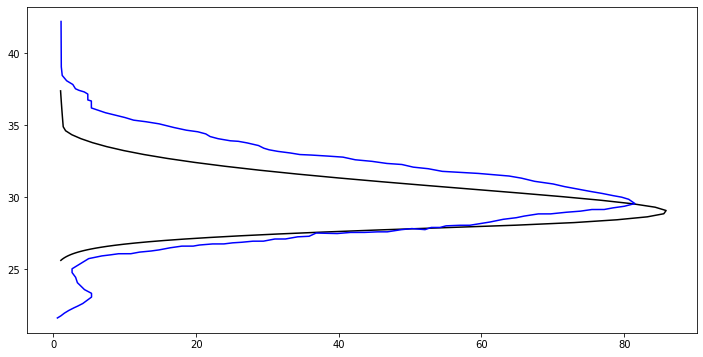

In [9]:
fig = plt.subplots(figsize=(12,6))

plt.plot(com_ek, com_z, 'k')
plt.plot(basic_ek, basic_z, 'b')
# plt.plot(itp_ek, com_z, 'g')

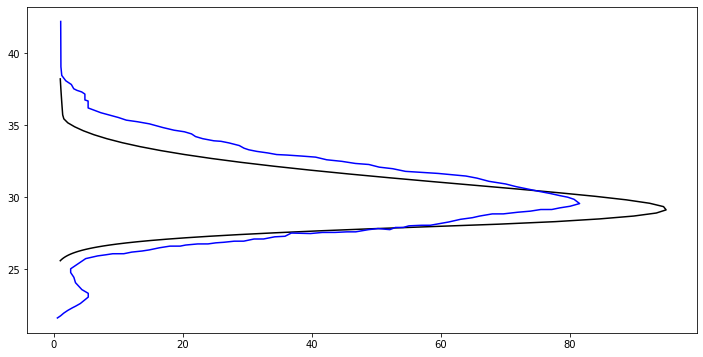

In [18]:
earth = sl.Planet()
out = earth.solve_atmospheric_entry(
    radius=8.673469387755102, angle=18.3, strength=5282031.25, velocity=19.2e3, density=3300)
out = earth.calculate_energy(out)
altitude = out.iloc[:,3]
energy = out.iloc[:,-1]
v_a = pd.DataFrame({'z':altitude, 'ek':energy})
valid = v_a.loc[v_a.iloc[:,-1] > 1]
com_z = valid.iloc[:,0].to_numpy()/1e3
com_ek = valid.iloc[:,1].to_numpy()

basic_DF = pd.read_csv('./data/ChelyabinskEnergyAltitude.csv')
basic_z, basic_ek = basic_DF.iloc[:,0].to_numpy(), basic_DF.iloc[:,1].to_numpy()

fig = plt.subplots(figsize=(12,6))

plt.plot(com_ek, com_z, 'k')
plt.plot(basic_ek, basic_z, 'b')